<a href="https://colab.research.google.com/github/FarzanaAdiba/ML_Assignment_03/blob/main/ML__Assignment3P1_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten


In [ ]:
#importing mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#normalizing the dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [ ]:
#Creating CNN Model
model=tf.keras.models.Sequential()
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(24, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

In [ ]:
#compiling model
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.build(input_shape=(1,28,28,1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 28, 28, 16)           160       
                                                                 
 conv2d_1 (Conv2D)           (1, 14, 14, 16)           2320      
                                                                 
 max_pooling2d (MaxPooling2D  (1, 7, 7, 16)            0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (1, 7, 7, 24)             3480      
                                                                 
 conv2d_3 (Conv2D)           (1, 4, 4, 24)             5208      
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 2, 2, 24)            0         
 2D)                                                    

In [ ]:
model1 = model
# Train the model.
history1 = model1.fit(
    x_train,
    y_train, validation_split = 0.2, 
    batch_size=500,epochs=25)


Epoch 1/25
96/96 [==============================] - 13s 16ms/step - loss: 2.3026 - accuracy: 0.1144 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 2/25
96/96 [==============================] - 1s 14ms/step - loss: 2.3025 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 3/25
96/96 [==============================] - 1s 13ms/step - loss: 2.3024 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 4/25
96/96 [==============================] - 1s 13ms/step - loss: 2.3024 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 5/25
96/96 [==============================] - 1s 13ms/step - loss: 2.3023 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 6/25
96/96 [==============================] - 1s 14ms/step - loss: 2.3023 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 7/25
96/96 [==============================] - 1s 14ms/step - loss: 2.3022 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 8/25
9

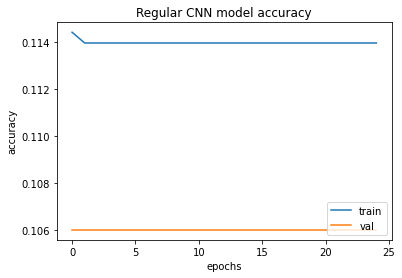

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Regular CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
# Evaluation
score = model1.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 2.3016 - accuracy: 0.1135
Test loss: 2.3015823364257812
Test accuracy: 0.11349999904632568


###Inverted CNN

In [ ]:
#Creating Inverted CNN Model
Inv_model=tf.keras.models.Sequential()

Inv_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
Inv_model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
Inv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
Inv_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
Inv_model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
Inv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
Inv_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
Inv_model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
Inv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
Inv_model.add(Conv2D(24, (3, 3), padding='same', activation='relu'))
Inv_model.add(Conv2D(24, (3, 3), strides=(2, 2), padding='same', activation='relu'))
Inv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
Inv_model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
Inv_model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
Inv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

Inv_model.add(tf.keras.layers.Flatten())
Inv_model.add(tf.keras.layers.Dense(256))
Inv_model.add(tf.keras.layers.Activation('relu'))
Inv_model.add(tf.keras.layers.Dense(10))
Inv_model.add(tf.keras.layers.Activation('softmax'))

In [ ]:
#compiling model
Inv_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
Inv_model.build(input_shape=(1,28,28,1))
Inv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (1, 28, 28, 128)          1280      
                                                                 
 conv2d_11 (Conv2D)          (1, 14, 14, 128)          147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (1, 7, 7, 128)           0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (1, 7, 7, 64)             73792     
                                                                 
 conv2d_13 (Conv2D)          (1, 4, 4, 64)             36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (1, 2, 2, 64)            0         
 2D)                                                  

In [ ]:
model2 = Inv_model
# Train the model.
history2 = model2.fit(
    x_train,
    y_train, validation_split = 0.2, 
    batch_size=500,epochs=25)


Epoch 1/25
96/96 [==============================] - 8s 70ms/step - loss: 2.3026 - accuracy: 0.1141 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 2/25
96/96 [==============================] - 6s 67ms/step - loss: 2.3025 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 3/25
96/96 [==============================] - 6s 68ms/step - loss: 2.3024 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 4/25
96/96 [==============================] - 6s 66ms/step - loss: 2.3024 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 5/25
96/96 [==============================] - 6s 68ms/step - loss: 2.3023 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 6/25
96/96 [==============================] - 7s 68ms/step - loss: 2.3023 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 7/25
96/96 [==============================] - 7s 68ms/step - loss: 2.3022 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 8/25
96

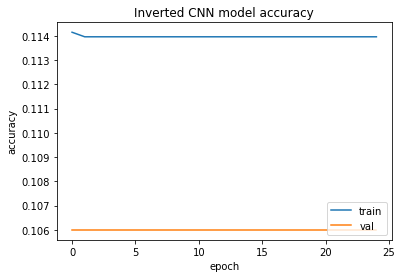

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Inverted CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
# Evaluation
score2 = model2.evaluate(x_test, y_test)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

313/313 [==============================] - 2s 4ms/step - loss: 2.3016 - accuracy: 0.1135
Test loss: 2.3016209602355957
Test accuracy: 0.11349999904632568


###Hour-glass shaped CNN where the number of filters will increase

In [ ]:
#Creating CNN Model
hg_model=tf.keras.models.Sequential()
hg_model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(24, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(24, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(24, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(24, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(tf.keras.layers.Flatten())
hg_model.add(tf.keras.layers.Dense(256))
hg_model.add(tf.keras.layers.Activation('relu'))
hg_model.add(tf.keras.layers.Dense(10))
hg_model.add(tf.keras.layers.Activation('softmax'))

In [ ]:
hg_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
hg_model.build(input_shape=(1,28,28,1))
hg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (1, 28, 28, 16)           160       
                                                                 
 conv2d_21 (Conv2D)          (1, 14, 14, 16)           2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (1, 7, 7, 16)            0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (1, 7, 7, 24)             3480      
                                                                 
 conv2d_23 (Conv2D)          (1, 4, 4, 24)             5208      
                                                                 
 max_pooling2d_11 (MaxPoolin  (1, 2, 2, 24)            0         
 g2D)                                                 

In [ ]:
model3 = hg_model
# Train the model.
history3 = model3.fit(
    x_train,
    y_train, validation_split = 0.2, 
    batch_size=500,epochs=25)


Epoch 1/25
96/96 [==============================] - 3s 19ms/step - loss: 2.3026 - accuracy: 0.1132 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 2/25
96/96 [==============================] - 2s 17ms/step - loss: 2.3025 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 3/25
96/96 [==============================] - 2s 16ms/step - loss: 2.3024 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 4/25
96/96 [==============================] - 2s 17ms/step - loss: 2.3024 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 5/25
96/96 [==============================] - 2s 17ms/step - loss: 2.3023 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 6/25
96/96 [==============================] - 2s 17ms/step - loss: 2.3023 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 7/25
96/96 [==============================] - 2s 17ms/step - loss: 2.3022 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 8/25
96

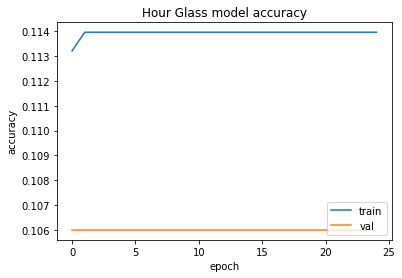

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Hour Glass model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
# Evaluation
score3 = model3.evaluate(x_test, y_test)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

313/313 [==============================] - 2s 5ms/step - loss: 2.3016 - accuracy: 0.1135
Test loss: 2.301619291305542
Test accuracy: 0.11349999904632568
